In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Activation, Conv2D
from tensorflow.keras.layers import Add

C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
import PIL
from PIL import Image

In [4]:
def custom_ssim(y_actual, y_predicted):
    y_actual = (1+y_actual)/2
    y_predicted = (1+y_predicted)/2
    return 1 - tf.image.ssim(y_actual, y_predicted, max_val=1)

In [5]:
num_train1 = 20 #número de imagens do conjunto de treinamento para sigma = 1
num_train3 = 20 #número de imagens do conjunto de treinamento para sigma = 3

In [6]:
soma1 = num_train1 + num_train3

blurred_train_aux = np.zeros((soma1, 256, 256, 1))
original_train_aux = np.zeros((soma1, 256, 256, 1))

for i in range (1, num_train1+1):
    blurred_train_aux[i-1, :, :, 0] = np.load('amostras_cinza/sigma1(7, 7)/arrays/degradada' + str(i) + '.npy')
    original_train_aux[i-1, :, :, 0] = np.load('amostras_cinza/original/arrays/original' + str(i) + '.npy')
    
for i in range (1, num_train3+1):
    blurred_train_aux[i+num_train1-1, :, :, 0] = np.load('amostras_cinza/sigma3(7, 7)/arrays/degradada' + str(i) + '.npy')
    original_train_aux[i+num_train1-1, :, :, 0] = np.load('amostras_cinza/original/arrays/original' + str(i) + '.npy')

In [7]:
blurred_train_aux = blurred_train_aux/(blurred_train_aux.max())
original_train_aux = original_train_aux/(original_train_aux.max())

In [8]:
blurred_train = 2*blurred_train_aux - 1
original_train = 2*original_train_aux - 1

In [9]:
blurred_train_tf = tf.convert_to_tensor(blurred_train_aux)
original_train_tf = tf.convert_to_tensor(original_train_aux)

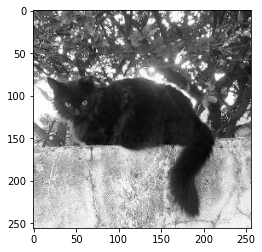

In [10]:
plt.imshow(original_train_aux[14, :, :, 0], cmap='gray')

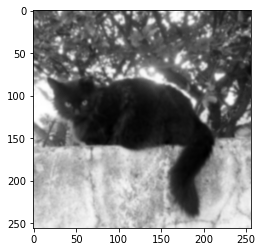

In [11]:
plt.imshow(blurred_train_aux[14, :, :, 0], cmap='gray')

In [12]:
blurred_test_aux = np.zeros((2, 256, 256, 1))
original_test_aux = np.zeros((2, 256, 256, 1))


blurred_test_aux[0, :, :, 0] = np.load('amostras_cinza/sigma1(7, 7)/arrays/degradada.npy')
original_test_aux[0, :, :, 0] = np.load('amostras_cinza/original/arrays/original.npy')

blurred_test_aux[1, :, :, 0] = np.load('amostras_cinza/sigma3(7, 7)/arrays/degradada.npy')
original_test_aux[1, :, :, 0] = np.load('amostras_cinza/original/arrays/original.npy')

In [13]:
blurred_test_aux = blurred_test_aux/(blurred_test_aux.max())
original_test_aux = original_test_aux/(original_test_aux.max())

In [14]:
blurred_test = 2*blurred_test_aux - 1
original_test = 2*original_test_aux - 1

In [15]:
blurred_test_tf = tf.convert_to_tensor(blurred_test_aux)
original_test_tf = tf.convert_to_tensor(original_test_aux)

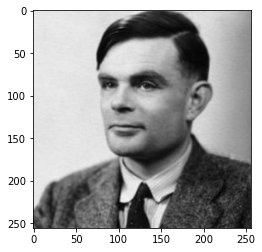

In [16]:
plt.imshow(original_test_aux[0, :, :, 0], cmap='gray')

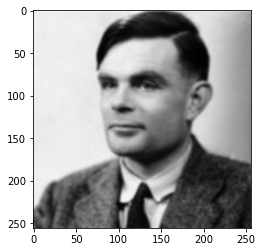

In [17]:
plt.imshow(blurred_test_aux[0, :, :, 0], cmap='gray')

In [18]:
def make_autoencoder(input_shape):
  
    X_input = Input(input_shape)

    X = Conv2D(1, (7, 7), padding="same")(X_input)
    X0 = Activation('tanh')(X)
    
    X = Conv2D(4, (7, 7), padding="same")(X0)
    X1 = Activation('tanh')(X)
    
    X = Conv2D(8, (7, 7), padding="same")(X1)
    X2 = Activation('tanh')(X)
    
    X = Conv2D(16, (7, 7), padding="same")(X2)
    X3 = Activation('tanh')(X)
    
    #X = Conv2D(32, (7, 7), padding="same")(X3)
    #X = Activation('tanh')(X)
 
    #camada latente

    #X = Conv2D(16, (7, 7), padding="same")(X)
    #X = Activation('tanh')(X)
    #X = Add()([X3, X])
    
    X = Conv2D(8, (7, 7), padding="same")(X3)
    X = Activation('tanh')(X)
    X = Add()([X2, X])
    
    X = Conv2D(4, (7, 7), padding="same")(X)
    X = Activation('tanh')(X)
    X = Add()([X1, X])
    
    X = Conv2D(1, (7, 7), padding="same")(X)
    X = Activation('tanh')(X)
    X = Add()([X0, X])
    
    X = Conv2D(1, (7, 7), padding="same")(X)
    X = Activation('tanh')(X)
    

    model = Model(inputs=X_input, outputs=X)
    
    return model

In [19]:
opt = Adam(lr=1e-4)
model = make_autoencoder(original_train.shape[1:])
model.compile(optimizer=opt, loss=custom_ssim)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 1)  50          input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 1)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 4)  200         activation[0][0]                 
______________________________________________________________________________________________

In [21]:
history = model.fit(x=blurred_train, y=original_train, epochs=20000, validation_data=[blurred_test, original_test])

Train on 40 samples, validate on 2 samples
Epoch 1/20000
40/40 [==============================] - 31s 775ms/sample - loss: 0.6230 - val_loss: 0.4584
Epoch 2/20000
40/40 [==============================] - 29s 713ms/sample - loss: 0.5998 - val_loss: 0.4269
Epoch 3/20000
40/40 [==============================] - 28s 691ms/sample - loss: 0.5769 - val_loss: 0.3983
Epoch 4/20000
40/40 [==============================] - 28s 693ms/sample - loss: 0.5570 - val_loss: 0.3756
Epoch 5/20000
40/40 [==============================] - 29s 723ms/sample - loss: 0.5415 - val_loss: 0.3584
Epoch 6/20000
40/40 [==============================] - 30s 739ms/sample - loss: 0.5289 - val_loss: 0.3448
Epoch 7/20000
40/40 [==============================] - 29s 719ms/sample - loss: 0.5184 - val_loss: 0.3334
Epoch 8/20000
40/40 [==============================] - 28s 709ms/sample - loss: 0.5092 - val_loss: 0.3240
Epoch 9/20000


KeyboardInterrupt: 

In [ ]:
plt.plot(10*np.log10(history.history['loss']))
plt.xlim(0, 20000)
plt.grid(color='black', linestyle='dotted')
plt.ylabel('1 - SSIM (dB)')
plt.xlabel('Época')
plt.show()

**Sigma = 1**

In [ ]:
blurred_test1_aux = np.zeros((2, 256, 256, 1))
original_test1_aux = np.zeros((2, 256, 256, 1))


blurred_test1_aux[0, :, :, 0] = np.load('amostras/sigma1(7, 7)/arrays/degradada.npy')
original_test1_aux[0, :, :, 0] = np.load('amostras/original/arrays/original.npy')

In [ ]:
blurred_test1_aux = blurred_test1_aux/(blurred_test1_aux.max())
original_test1_aux = original_test1_aux/(original_test1_aux.max())

In [ ]:
blurred_test1 = (2*blurred_test1_aux)-1
original_test1 = (2*original_test1_aux)-1

In [ ]:
blurred_test1_tf = tf.convert_to_tensor(blurred_test1_aux)
original_test1_tf = tf.convert_to_tensor(original_test1_aux)

In [ ]:
test_prediction1 = (1+model.predict(blurred_test1))/2
test_prediction1_tf = tf.convert_to_tensor(test_prediction1, np.float64)

In [ ]:
plt.imshow(blurred_test1_aux[0 , :, :, 0], cmap='gray')

In [ ]:
plt.imshow(original_test1_aux[0, :, :, 0], cmap='gray')

In [ ]:
plt.imshow(test_prediction1[0, :, :, 0], cmap='gray')

In [ ]:
tf.image.ssim(original_test1_tf[0, :, :, :], blurred_test1_tf[0, :, :, :], max_val=1).numpy()

In [ ]:
tf.image.ssim(original_test1_tf[0, :, :, :], test_prediction1_tf[0, :, :, :], max_val=1).numpy()


**Sigma = 2**

In [ ]:
blurred_test2_aux = np.zeros((2, 256, 256, 1))
original_test2_aux = np.zeros((2, 256, 256, 1))


blurred_test2_aux[0, :, :, 0] = np.load('amostras/sigma2(7, 7)/arrays/degradada.npy')
original_test2_aux[0, :, :, 0] = np.load('amostras/original/arrays/original.npy')

In [ ]:
blurred_test2_aux = blurred_test2_aux/(blurred_test2_aux.max())
original_test2_aux = original_test2_aux/(original_test2_aux.max())

In [ ]:
blurred_test2 = (2*blurred_test2_aux)-1
original_test2 = (2*original_test2_aux)-1

In [ ]:
blurred_test2_tf = tf.convert_to_tensor(blurred_test2_aux)
original_test2_tf = tf.convert_to_tensor(original_test2_aux)

In [ ]:
test_prediction2 = (1+model.predict(blurred_test2))/2
test_prediction2_tf = tf.convert_to_tensor(test_prediction2, np.float64)

In [ ]:
plt.imshow(blurred_test2_aux[0 , :, :, 0], cmap='gray')

In [ ]:
plt.imshow(original_test2_aux[0, :, :, 0], cmap='gray')

In [ ]:
plt.imshow(test_prediction2[0, :, :, 0], cmap='gray')

In [ ]:
tf.image.ssim(original_test2_tf[0, :, :, :], blurred_test2_tf[0, :, :, :], max_val=1).numpy()

In [ ]:
tf.image.ssim(original_test2_tf[0, :, :, :], test_prediction2_tf[0, :, :, :], max_val=1).numpy()


**Sigma = 3**

In [ ]:
blurred_test3_aux = np.zeros((2, 256, 256, 1))
original_test3_aux = np.zeros((2, 256, 256, 1))


blurred_test3_aux[0, :, :, 0] = np.load('amostras/sigma3(7, 7)/arrays/degradada.npy')
original_test3_aux[0, :, :, 0] = np.load('amostras/original/arrays/original.npy')

In [ ]:
blurred_test3_aux = blurred_test3_aux/(blurred_test3_aux.max())
original_test3_aux = original_test3_aux/(original_test3_aux.max())

In [ ]:
blurred_test3 = (2*blurred_test3_aux)-1
original_test3 = (2*original_test3_aux)-1

In [ ]:
blurred_test3_tf = tf.convert_to_tensor(blurred_test3_aux)
original_test3_tf = tf.convert_to_tensor(original_test3_aux)

In [ ]:
test_prediction3 = (1+model.predict(blurred_test3))/2
test_prediction3_tf = tf.convert_to_tensor(test_prediction3, np.float64)

In [ ]:
plt.imshow(blurred_test3_aux[0 , :, :, 0], cmap='gray')

In [ ]:
plt.imshow(original_test3_aux[0, :, :, 0], cmap='gray')

In [ ]:
plt.imshow(test_prediction3[0, :, :, 0], cmap='gray')

In [ ]:
tf.image.ssim(original_test3_tf[0, :, :, :], blurred_test3_tf[0, :, :, :], max_val=1).numpy()

In [ ]:
tf.image.ssim(original_test3_tf[0, :, :, :], test_prediction3_tf[0, :, :, :], max_val=1).numpy()
